In [7]:
# This Notebook is for measuring the popularity of test items
from experiments.data_loader import DataLoader
from shared.enums import Sentiment
import numpy as np
from scipy import stats 
from matplotlib import pyplot as plt 
import seaborn as sns

data_loader = DataLoader('../../../debug/data/default_equal_probability/split_0')

entity_ratings = dict()

for user, ratings in data_loader.training().items():
    for item, rating in ratings.training.items():
        entity_ratings[item] = entity_ratings.get(item, 0) + 1
        pass

print(entity_ratings)

{7129: 324, 8: 632, 9: 605, 18450: 247, 5: 118, 1583: 600, 14021: 397, 1143: 112, 4458: 557, 5359: 37, 13404: 22, 2982: 531, 4994: 27, 1405: 279, 3731: 87, 4395: 121, 1566: 25, 14647: 19, 11835: 10, 17597: 2, 16958: 9, 4705: 6, 2921: 9, 3566: 5, 11958: 6, 5026: 2, 5877: 2, 4933: 6, 6052: 4, 153: 8, 5783: 4, 14862: 4, 17421: 7, 16106: 1, 3854: 1, 9209: 2, 2291: 2, 5412: 4, 15803: 2, 13233: 430, 2977: 396, 5173: 41, 12160: 205, 3986: 6, 17697: 372, 3057: 211, 7: 528, 4592: 155, 9866: 323, 4201: 68, 6: 297, 4707: 104, 186: 197, 1850: 51, 4525: 18, 4499: 63, 15030: 21, 11269: 78, 3722: 6, 12793: 24, 5095: 68, 15334: 42, 3739: 22, 15730: 5, 7037: 19, 15749: 8, 4: 55, 992: 21, 8260: 10, 13606: 50, 5679: 11, 4546: 29, 15849: 102, 13663: 6, 13408: 30, 4521: 10, 445: 6, 15178: 13, 122: 2, 5579: 7, 4920: 4, 10286: 9, 16034: 3, 2871: 8, 17086: 10, 8131: 5, 5295: 5, 8074: 5, 11140: 5, 5383: 2, 2510: 6, 9938: 1, 4484: 5, 5718: 12, 17445: 2, 11942: 1, 17416: 4, 14300: 1, 4291: 1, 3894: 2, 2750: 246,

np.mean(differences)=12.603164142132915
DescribeResult(nobs=240, minmax=(1, 108), mean=21.8875, variance=464.61072175732215, skewness=1.4463300748492196, kurtosis=2.077917265405941)
np.median(positive_ratings)=15.0
DescribeResult(nobs=24000, minmax=(1, 79), mean=10.46825, variance=137.12253870994624, skewness=2.0409269400287875, kurtosis=5.0323126152243365)
np.median(unseen_ratings)=6.0
13.0
1.0


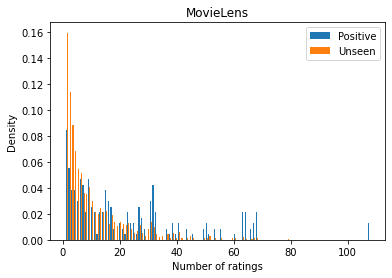

In [8]:
# How popular are positive items compared to unseen samples

positive_ratings = list()
unseen_ratings = list()
differences = list()

for user, ratings in data_loader.testing().items():
    items = set()
    for cold_set in ratings.sets:
        positive_items = cold_set.ranking.sentiment_samples[Sentiment.POSITIVE]
        unseen_items = cold_set.ranking.sentiment_samples[Sentiment.UNSEEN]
        
        for item in positive_items:
            positive_ratings.append(entity_ratings.get(item, 0))
            
        for item in unseen_items:
            unseen_ratings.append(entity_ratings.get(item, 0))
            
        differences.append(np.mean(positive_ratings) - np.mean(unseen_ratings))

print(f'{np.mean(differences)=}')
print(stats.describe(positive_ratings))
print(f'{np.median(positive_ratings)=}')
print(stats.describe(unseen_ratings))
print(f'{np.median(unseen_ratings)=}')

print(f'{np.percentile(positive_ratings, 45)}')
print(f'{np.percentile(unseen_ratings, 3)}')
plt.hist([positive_ratings, unseen_ratings], bins=109, label=['Positive', 'Unseen'], density=True)
plt.legend(loc='upper right')
plt.xlabel('Number of ratings')
plt.ylabel('Density')
plt.title('MovieLens')
plt.savefig('sampling_popularity_bias.pdf', bbox_inches='tight')

In [9]:
# How many unique positive samples we have per test user
test_ratings = dict()
unseen_ratings = dict()
lengths = []

for user, ratings in data_loader.testing().items():
    items = set()
    for cold_set in ratings.sets:
        positive_items = cold_set.ranking.sentiment_samples[Sentiment.POSITIVE]
        
        items.update(positive_items)

    lengths.append(len(items))

print(stats.describe(lengths))

DescribeResult(nobs=240, minmax=(1, 1), mean=1.0, variance=0.0, skewness=0.0, kurtosis=-3.0)
